### 0 Explaination

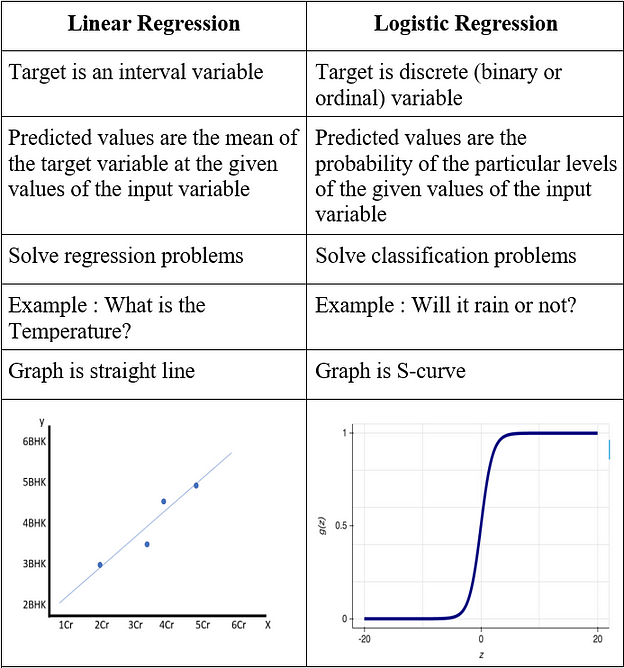

* Source: https://medium.com/@harikrishnakandukuru/linear-regression-1558295f6840

### 1 Linear Regression
1. Dataset
2. Model

In [1]:
# Import Libraries
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# 0) Prepare data - prepare a regression pattern numbers as numpy
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) # changing the shape, ready for output and loss calculation

n_samples, n_features = X.shape

epoch: 10, loss = 4048.6719
epoch: 20, loss = 2853.8506
epoch: 30, loss = 2039.2106
epoch: 40, loss = 1483.6659
epoch: 50, loss = 1104.7330
epoch: 60, loss = 846.2141
epoch: 70, loss = 669.8100
epoch: 80, loss = 549.4153
epoch: 90, loss = 467.2310
epoch: 100, loss = 411.1201


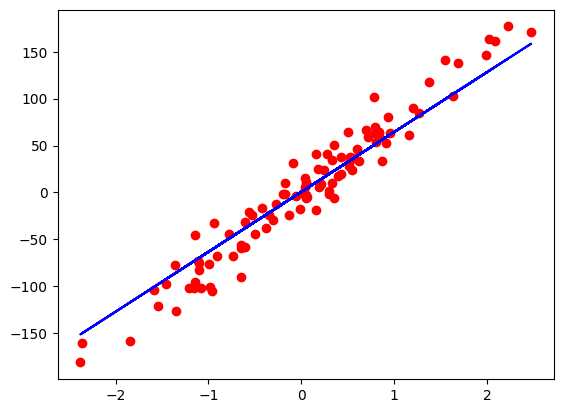

In [3]:
# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size) # very simple one liner model!

# 2) Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

### 2 Logistic Regression
1. Dataset + Scaling
2. Model
3. Accuracy

In [4]:
# Import Libraries
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
# 0) Prepare data - dataset is logistic
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape # 569, 30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# converting to tensor
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# reshaping target tensors
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [6]:
# 1) Model
# Linear model f = wx + b , (in Logistic regression) sigmoid at the end
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)

# 2) Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0]) # for every equal and correct y_pred with y_test
    print(f'accuracy: {acc.item():.4f}')

epoch: 10, loss = 0.5695
epoch: 20, loss = 0.4791
epoch: 30, loss = 0.4186
epoch: 40, loss = 0.3754
epoch: 50, loss = 0.3429
epoch: 60, loss = 0.3175
epoch: 70, loss = 0.2969
epoch: 80, loss = 0.2799
epoch: 90, loss = 0.2655
epoch: 100, loss = 0.2531
accuracy: 0.9211
